In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape

(10000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.duplicated('CustomerId').sum()

0

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df.replace({'Geography': {'France':0, 'Germany':1, 'Spain':2}}, inplace=True)

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.replace({'Gender': {'Male':0, 'Female':1}}, inplace=True)

In [10]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [11]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [12]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [13]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [14]:
X.shape, y.shape

((10000, 10), (10000,))

In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

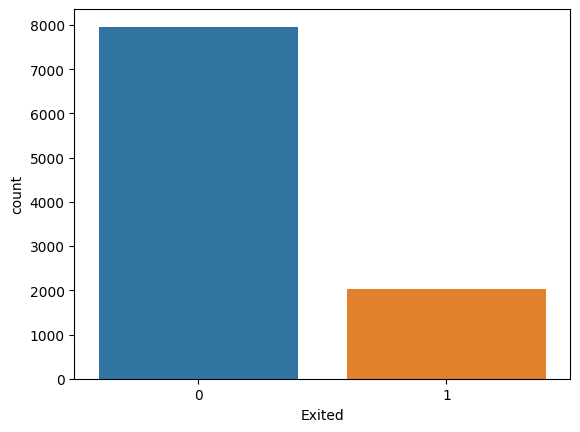

In [16]:
sns.countplot(x='Exited', data=df)

# Random Under Sampling

In [17]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
X_rus.shape, y_rus.shape

((4074, 10), (4074,))

In [18]:
y_rus.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

# Random Over Sampling

In [19]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_ros.shape, y_ros.shape

((15926, 10), (15926,))

In [20]:
y_ros.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

# Train Test Split

In [21]:
# Original Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Random Under Sampled
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)
# Random Over Sampled
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

# Standard Scaler

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Random Under Sampled
X_rus_train_scaled = scaler.fit_transform(X_rus_train)
X_rus_test_scaled = scaler.transform(X_rus_test)
# Random Over Sampled
X_ros_train_scaled = scaler.fit_transform(X_ros_train)
X_ros_test_scaled = scaler.transform(X_ros_test)

# Random Forest Classifier

### Original Data

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8693333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000



### Random Under Sampled Data

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_rus_train_scaled, y_rus_train)

RandomForestClassifier(random_state=42)

In [26]:
y_rus_pred = model.predict(X_rus_test_scaled)
print("Accuracy: ", accuracy_score(y_rus_test, y_rus_pred))
print("Classification Report:\n", classification_report(y_rus_test, y_rus_pred))

Accuracy:  0.7555192150449714
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       640
           1       0.75      0.74      0.74       583

    accuracy                           0.76      1223
   macro avg       0.76      0.75      0.75      1223
weighted avg       0.76      0.76      0.76      1223



### Random Over Sampled Data

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_ros_train_scaled, y_ros_train)

RandomForestClassifier(random_state=42)

In [28]:
y_ros_pred = model.predict(X_ros_test_scaled)
print("Accuracy: ", accuracy_score(y_ros_test, y_ros_pred))
print("Classification Report:\n", classification_report(y_ros_test, y_ros_pred))

Accuracy:  0.9388865634156551
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      2426
           1       0.91      0.97      0.94      2352

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



In [29]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
3,Age,0.260044
5,Balance,0.141518
9,EstimatedSalary,0.138842
0,CreditScore,0.138150
6,NumOfProducts,0.127526
4,Tenure,0.081076
1,Geography,0.038048
8,IsActiveMember,0.035514
2,Gender,0.020620
7,HasCrCard,0.018662


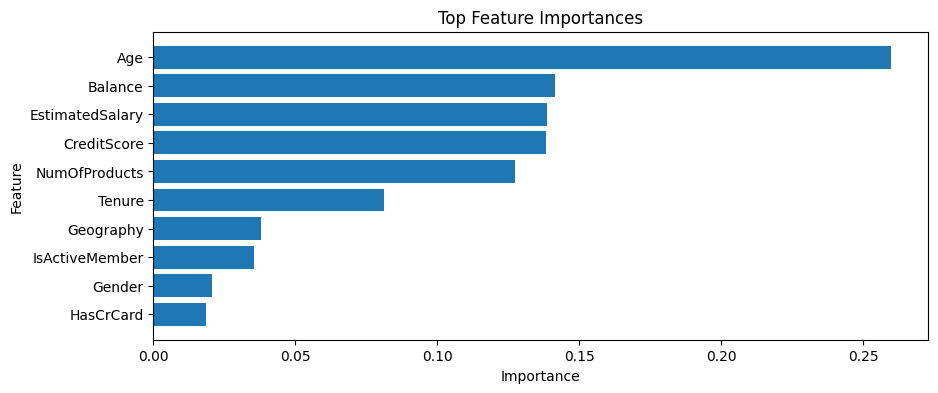

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.barh(feature_importance_df['Feature'][:], feature_importance_df['Importance'][:])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Conclusion

In summary, the analysis of customer churn prediction yielded valuable insights. The original dataset achieved an accuracy of 0.87, but random under-sampling decreased it to 0.76, highlighting the balance-accuracy trade-off. Conversely, random over-sampling improved accuracy to 0.94. Age emerged as the top feature, followed by balance, estimated salary, and credit score in order of importance. These findings underscore the significance of these factors in predicting customer churn. The choice between under-sampling and over-sampling depends on the balance-accuracy trade-off, with these key features playing crucial roles in customer retention analysis.